In [1]:
import lec.toroidalField as tfield
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import fft
from typing import Tuple

### 实数场$A(\theta, \varphi)$的表示

使用函数基$\mathrm{e}^{\mathrm{i}(m\theta-nN_{fp}\varphi)}$去描述二维环形场$A(\theta,\varphi)$
$$ A(\theta,\varphi) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\varphi)) $$

$A$为实数时，$A_{0,0}$为实数，且$A_{m,m}$满足$A_{m,n}=A^*_{m,n}$，此时有
$$ A(\theta, \varphi) = A_{0,0} + \sum_{n=1}^N(A_{0,n}\exp(-\mathrm{i}nN_{fp}\varphi) + A^*_{0,n}\exp(\mathrm{i}nN_{fp}\varphi))  
+ \sum_{m=1}^M\sum_{n=-N}^N(A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\varphi))+A^*_{m,n}\exp(-\mathrm{i}(m\theta-nN_{fp}\varphi))) $$

利用Euler公式$\mathrm{e}^{\mathrm{i}\alpha}=\cos\alpha+\mathrm{i}\sin\alpha$有
$$ A(\theta,\varphi) = \Re(A_{0,0}) + 2\sum_{n=1}^{N}\{ \Re(A_{0,n})\cos(nN_{fp}\varphi)-\Im(A_{0,n})\sin(-nN_{fp}\varphi) \} + 2\sum_{m=1}^{M}\sum_{n=-N}^N\{ \Re(A_{m,n})\cos(m\theta-nN_{fp}\varphi)-\Im(A_{m,n})\sin(m\theta-nN_{fp}\varphi) \} $$

In [2]:
nfp = 2
funA = lambda theta, varphi: 1 + np.sin(theta-nfp*varphi) + 0.2*np.cos(3*theta+2*nfp*varphi)
funB = lambda theta, varphi: -0.5 + 1.1*np.cos(2*theta-nfp*varphi) - 0.2*np.sin(theta+2*nfp*varphi) + 0.05*np.cos(3*theta-nfp*varphi)

sampleNumsTheta, sampleNumsPhi = 6, 4
deltaTheta = 2*np.pi / (2*sampleNumsTheta+1)
deltaVarPhi = 2*np.pi / nfp / (2*sampleNumsPhi+1)
sampleTheta, sampleVarPhi = np.arange(2*sampleNumsTheta+1)*deltaTheta, np.arange(2*sampleNumsPhi+1)*deltaVarPhi
gridSampleVarPhi, gridSampleTheta = np.meshgrid(sampleVarPhi, sampleTheta)
sampleA = funA(gridSampleTheta, -gridSampleVarPhi)
sampleB = funB(gridSampleTheta, -gridSampleVarPhi)

fieldA = tfield.fftToroidalField(sampleA, nfp=nfp)
fieldB = tfield.fftToroidalField(sampleB, nfp=nfp)

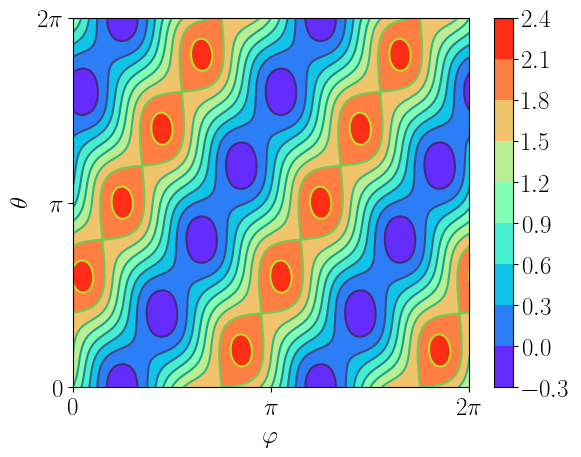

In [3]:
basisTheta, basisVarPhi = np.linspace(0, 2*np.pi, 500), np.linspace(0, 2*np.pi, 500)
gridBasisVarPhi, gridBasisTheta = np.meshgrid(basisVarPhi, basisTheta)

fig, ax = plt.subplots()
ax.contour(
    gridBasisVarPhi, gridBasisTheta, funA(gridBasisTheta,gridBasisVarPhi)
)
fieldA.plot_plt(ax=ax, fig=fig, onePeriod=False)

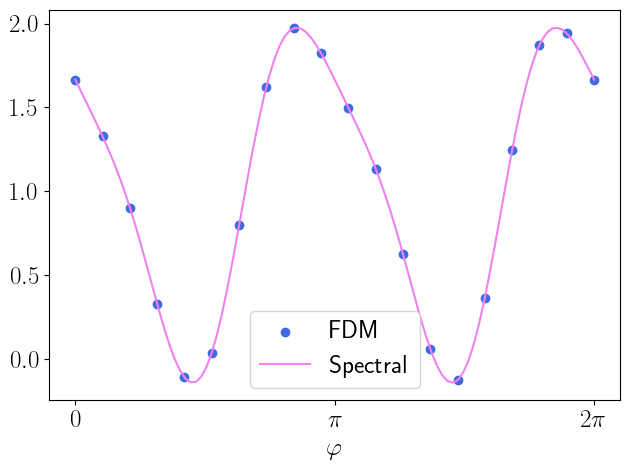

In [4]:
theta = np.pi / 3
fig, ax = plt.subplots()

ax.scatter(
    np.linspace(0,2*np.pi,20), funA(np.ones(20)*theta, np.linspace(0,2*np.pi,20)), 
    color="royalblue", label="FDM"
)
ax.plot(
    np.linspace(0,2*np.pi,100), fieldA.getValue(np.ones(100)*theta, np.linspace(0,2*np.pi,100)).flatten(), 
    color="violet", label="Spectral"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\varphi$", fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)
fig.tight_layout()

### 实数场$A(\theta, \varphi)$和$B(\theta, \varphi)$的加减

In [5]:
fieldAdd = fieldA + fieldB
fieldSubtract = fieldA - fieldB

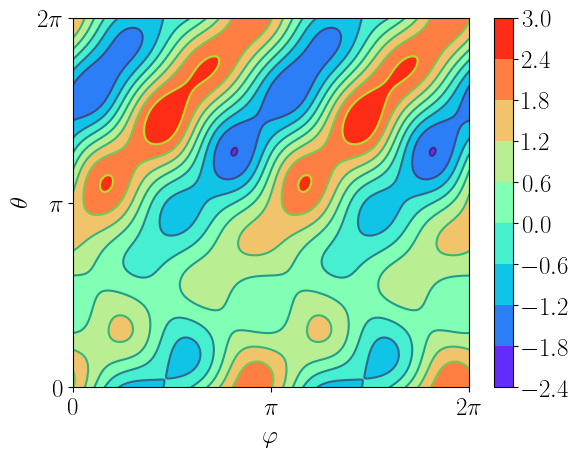

In [6]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisVarPhi, gridBasisTheta, funA(gridBasisTheta,gridBasisVarPhi)+funB(gridBasisTheta,gridBasisVarPhi)
)
fieldAdd.plot_plt(ax=ax, fig=fig, onePeriod=False)

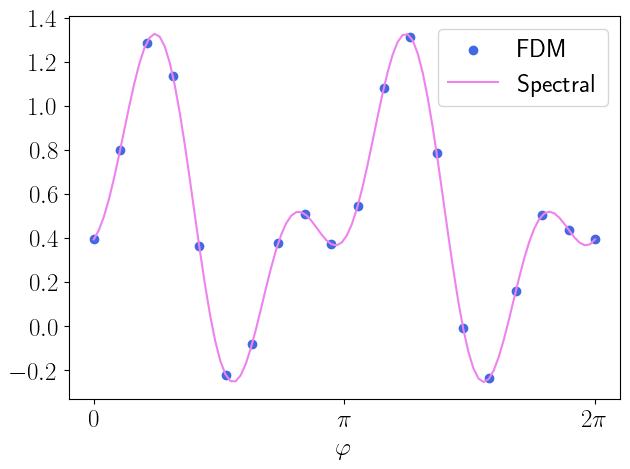

In [7]:
theta = np.pi / 3
fig, ax = plt.subplots()

ax.scatter(
    np.linspace(0,2*np.pi,20), funA(np.ones(20)*theta, np.linspace(0,2*np.pi,20))+funB(np.ones(20)*theta, np.linspace(0,2*np.pi,20)), 
    color="royalblue", label="FDM"
)
ax.plot(
    np.linspace(0,2*np.pi,100), fieldAdd.getValue(np.ones(100)*theta, np.linspace(0,2*np.pi,100)).flatten(), 
    color="violet", label="Spectral"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\varphi$", fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)
fig.tight_layout()

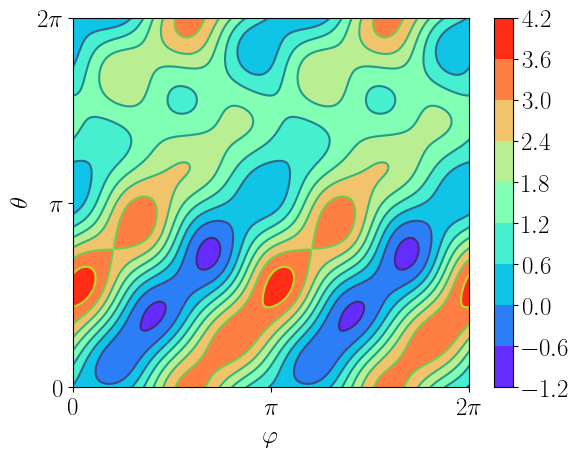

In [8]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisVarPhi, gridBasisTheta, funA(gridBasisTheta,gridBasisVarPhi)-funB(gridBasisTheta,gridBasisVarPhi)
)
fieldSubtract.plot_plt(ax=ax, fig=fig, onePeriod=False)

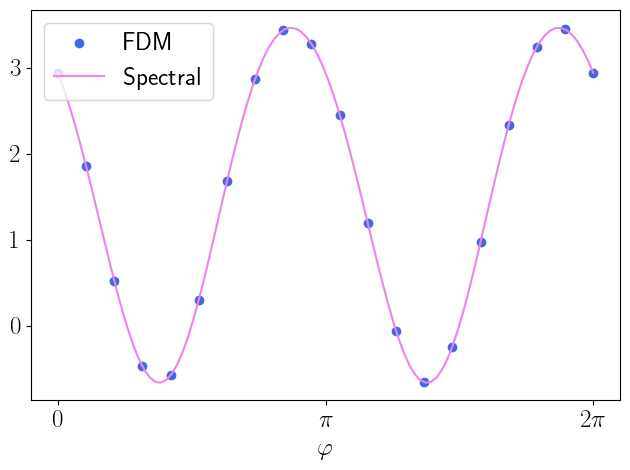

In [9]:
theta = np.pi / 3
fig, ax = plt.subplots()

ax.scatter(
    np.linspace(0,2*np.pi,20), funA(np.ones(20)*theta, np.linspace(0,2*np.pi,20))-funB(np.ones(20)*theta, np.linspace(0,2*np.pi,20)), 
    color="royalblue", label="FDM"
)
ax.plot(
    np.linspace(0,2*np.pi,100), fieldSubtract.getValue(np.ones(100)*theta, np.linspace(0,2*np.pi,100)).flatten(), 
    color="violet", label="Spectral"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\varphi$", fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)
fig.tight_layout()

### 实数场$A(\theta, \varphi)$的导数

对于二维环形场$A(\theta,\varphi)$
$$ A(\theta,\varphi) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\varphi)) $$
其导数可以表示为
$$ \frac{\partial A}{\partial\theta} = \sum_{m=-M}^{M}\sum_{n=-N}^N\mathrm{i}mA_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\varphi)) $$
$$ \frac{\partial A}{\partial\varphi} = \sum_{m=-M}^{M}\sum_{n=-N}^N-\mathrm{i}nN_{fp}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\varphi)) $$

In [10]:
dPolField = tfield.derivatePol(fieldAdd)
dTorField = tfield.derivateTor(fieldAdd)

In [11]:
def getDerivate(field: tfield.ToroidalField, thetaArr: np.ndarray, varphiArr: np.ndarray) -> Tuple[np.ndarray]:
    deltaTheta, deltaPhi = 1e-10, 1e-10
    valueTheta = field.getValue(thetaArr+deltaTheta, varphiArr)
    value_Theta = field.getValue(thetaArr-deltaTheta, varphiArr)
    valuePhi = field.getValue(thetaArr, varphiArr+deltaPhi)
    value_Phi = field.getValue(thetaArr, varphiArr-deltaPhi)
    return (valueTheta-value_Theta)/deltaTheta/2, (valuePhi-value_Phi)/deltaPhi/2

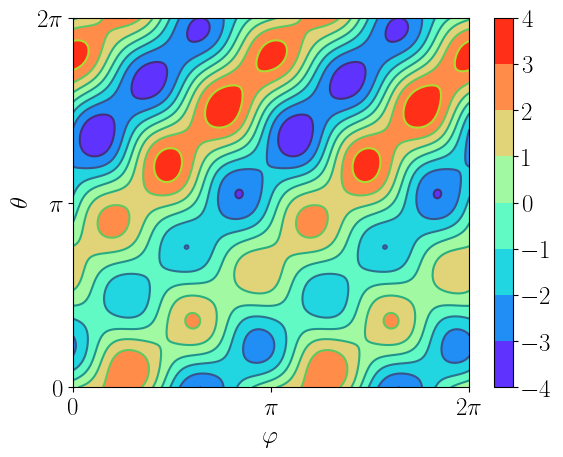

In [12]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisVarPhi, gridBasisTheta, getDerivate(fieldAdd, gridBasisTheta, gridBasisVarPhi)[0]
)
dPolField.plot_plt(ax=ax, fig=fig, onePeriod=False)

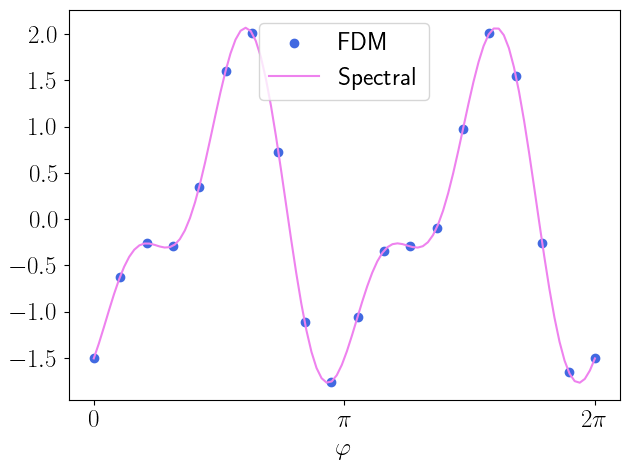

In [13]:
theta = np.pi / 3
fig, ax = plt.subplots()

ax.scatter(
    np.linspace(0,2*np.pi,20), getDerivate(fieldAdd, np.ones(20)*theta, np.linspace(0,2*np.pi,20))[0], 
    color="royalblue", label="FDM"
)
ax.plot(
    np.linspace(0,2*np.pi,100), dPolField.getValue(np.ones(100)*theta, np.linspace(0,2*np.pi,100)).flatten(), 
    color="violet", label="Spectral"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\varphi$", fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)
fig.tight_layout()

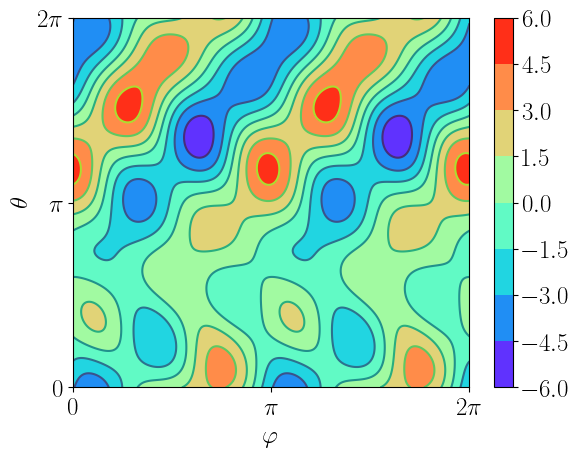

In [14]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisVarPhi, gridBasisTheta, getDerivate(fieldAdd, gridBasisTheta, gridBasisVarPhi)[1]
)
dTorField.plot_plt(ax=ax, fig=fig, onePeriod=False)

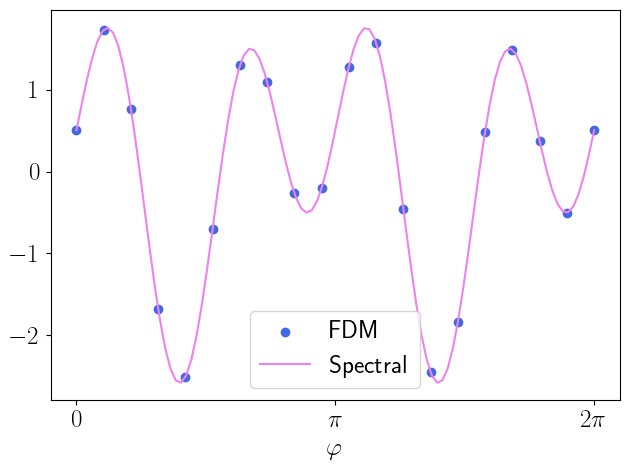

In [15]:
theta = np.pi / 3
fig, ax = plt.subplots()

ax.scatter(
    np.linspace(0,2*np.pi,20), getDerivate(fieldAdd, np.ones(20)*theta, np.linspace(0,2*np.pi,20))[1], 
    color="royalblue", label="FDM"
)
ax.plot(
    np.linspace(0,2*np.pi,100), dTorField.getValue(np.ones(100)*theta, np.linspace(0,2*np.pi,100)).flatten(), 
    color="violet", label="Spectral"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\varphi$", fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)
fig.tight_layout()

### 卷积计算$A(\theta, \varphi)$和$B(\theta, \varphi)$的积

使用函数基$\mathrm{e}^{\mathrm{i}(m\theta-nN_{fp}\varphi)}$去描述二维环形场$A$和$B$
$$ A(\theta,\varphi) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\varphi)) $$
$$ B(\theta,\varphi) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}B_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\varphi)) $$

$A$和$B$的乘积可以表示为
$$ AB = \sum_{m=-M}^{M}\sum_{n=-N}^{N}(AB)_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\varphi)) $$
其中
$$ (AB)_{m,n} = \sum_{m'=-M}^{M}\sum_{n'=-N}^{N}A_{m',n'}B_{m-m',n-n'} $$

In [16]:
fieldMulti = fieldA * fieldB

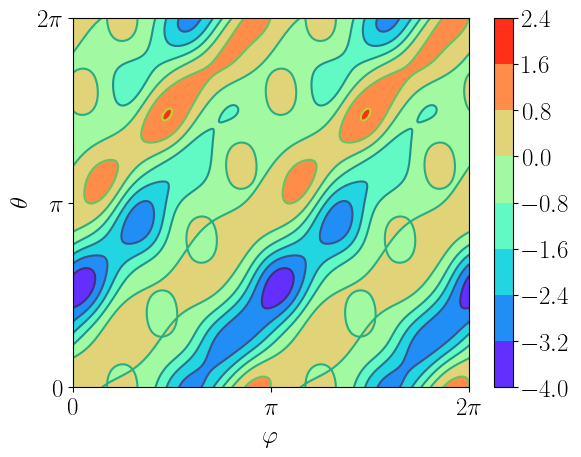

In [17]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisVarPhi, gridBasisTheta, funA(gridBasisTheta,gridBasisVarPhi)*funB(gridBasisTheta,gridBasisVarPhi)
)
fieldMulti.plot_plt(ax=ax, fig=fig, onePeriod=False)

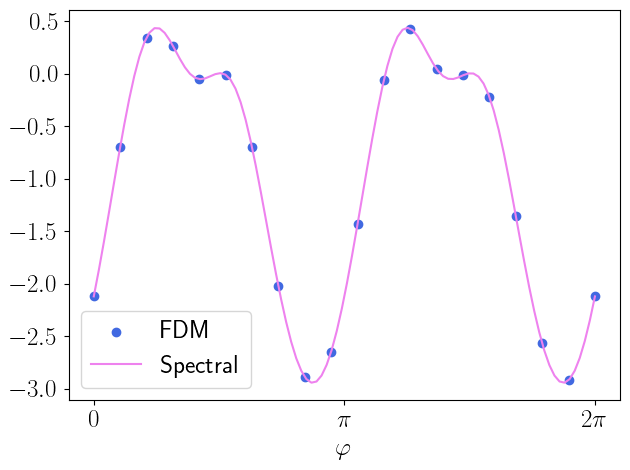

In [18]:
theta = np.pi / 3
fig, ax = plt.subplots()

ax.scatter(
    np.linspace(0,2*np.pi,20), funA(np.ones(20)*theta, np.linspace(0,2*np.pi,20))*funB(np.ones(20)*theta, np.linspace(0,2*np.pi,20)), 
    color="royalblue", label="FDM"
)
ax.plot(
    np.linspace(0,2*np.pi,100), fieldMulti.getValue(np.ones(100)*theta, np.linspace(0,2*np.pi,100)).flatten(), 
    color="violet", label="Spectral"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\varphi$", fontsize=18)
xValues = np.linspace(0, 2*np.pi, 3)
ax.set_xticks(xValues)
ax.set_xticklabels([r"$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)
fig.tight_layout()